In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
def cleanData(filePath, filePathJson, encoding):
    data = pd.read_csv(filePath, encoding=encoding)
    data['trending_date'] = '20' + data['trending_date']
    data['trending_date'] = pd.to_datetime(data['trending_date'],format='%Y.%d.%m')
    categories = pd.read_json(filePathJson)
    catData = json_normalize(categories['items'])
    idToCategories = pd.DataFrame(columns=['category_id', 'category'])
    idToCategories['category_id'] = catData['id']
    idToCategories['category'] = catData['snippet.title']
    idToCategories['category_id'] = idToCategories['category_id'].astype('int64')
    myData = pd.merge(data, idToCategories)
    myData = myData.drop(columns='category_id')
    myData['tags'] = myData.tags.str.strip().str.lower().str.replace('"','').str.replace('|',',')
    myData = myData.drop_duplicates()
    return myData

In [3]:
us = cleanData('../Data/Youtube/USvideos.csv', '../Data/Youtube/US_category_id.json', "latin_1")
mx = cleanData('../Data/Youtube/MXvideos.csv', '../Data/Youtube/MX_category_id.json', "latin_1")
ca = cleanData('../Data/Youtube/CAvideos.csv', '../Data/Youtube/CA_category_id.json', "latin_1")
de = cleanData('../Data/Youtube/DEvideos.csv', '../Data/Youtube/DE_category_id.json', "latin_1")
gb = cleanData('../Data/Youtube/GBvideos.csv', '../Data/Youtube/GB_category_id.json', "latin_1")
ind = cleanData('../Data/Youtube/INvideos.csv', '../Data/Youtube/IN_category_id.json', "latin_1")

# Most Common Title Words (Worldwide)

In [4]:
def mostCommonWords(df):
    word_count = {}
    for title in df['title']:
        title_formatted = title.lower()
        for word in title_formatted.split(' '):
            word = ''.join(e for e in word if e.isalnum())
            if word in word_count:
                word_count[word] = word_count[word] + 1
            else:
                word_count[word] = 1
    df_counts = pd.DataFrame.from_dict(word_count, orient='index')
    df_counts = df_counts.drop('')
    return df_counts

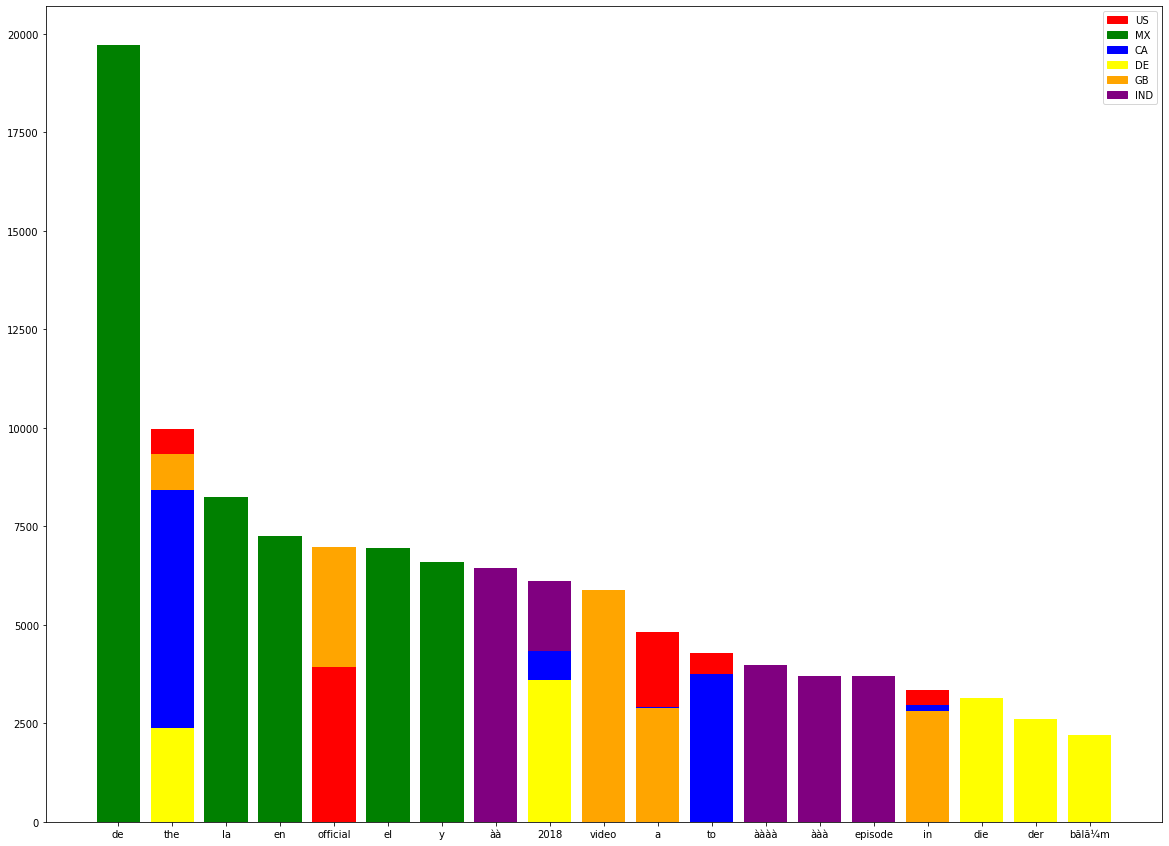

In [5]:
us_df_counts = mostCommonWords(us).sort_values(by=[0],ascending=False).head(5)
us_df_counts['country'] = 'us'
us_df_counts['color'] = 'red'
mx_df_counts = mostCommonWords(mx).sort_values(by=[0],ascending=False).head(5)
mx_df_counts['country'] = 'mx'
mx_df_counts['color'] = 'green'
ca_df_counts = mostCommonWords(ca).sort_values(by=[0],ascending=False).head(5)
ca_df_counts['country'] = 'ca'
ca_df_counts['color'] = 'blue'
de_df_counts = mostCommonWords(de).sort_values(by=[0],ascending=False).head(5)
de_df_counts['country'] = 'de'
de_df_counts['color'] = 'yellow'
gb_df_counts = mostCommonWords(gb).sort_values(by=[0],ascending=False).head(5)
gb_df_counts['country'] = 'gb'
gb_df_counts['color'] = 'orange'
ind_df_counts = mostCommonWords(ind).sort_values(by=[0],ascending=False).head(5)
ind_df_counts['country'] = 'ind'
ind_df_counts['color'] = 'purple'
df = us_df_counts
df = df.append(mx_df_counts) 
df = df.append(ca_df_counts) 
df = df.append(de_df_counts) 
df = df.append(gb_df_counts) 
df = df.append(ind_df_counts) 
df = df.sort_values(by=[0],ascending=False)
plt.figure(figsize = (20,15))
plt.bar(df.index, df[0], color=df['color'])
red_patch = mpatches.Patch(color='red', label='US')
green_patch = mpatches.Patch(color='green', label='MX')
blue_patch = mpatches.Patch(color='blue', label='CA')
yellow_patch = mpatches.Patch(color='yellow', label='DE')
orange_patch = mpatches.Patch(color='orange', label='GB')
purple_patch = mpatches.Patch(color='purple', label='IND')
plt.legend(handles=[red_patch, green_patch, blue_patch, yellow_patch, orange_patch, purple_patch])

# Most Trending Tags (Worldwide)

In [6]:
def mostTrendingTags(df):
    df['tags'] = df.tags.str.strip().str.lower().str.replace('"','').str.replace('|',',')
    word_count = {}
    for title in df['tags']:
        title_formatted = title.lower()
        for word in title_formatted.split(','):
            word = ''.join(e for e in word if e.isalnum())
            if word in word_count:
                word_count[word] = word_count[word] + 1
            else:
                word_count[word] = 1
    df_counts = pd.DataFrame.from_dict(word_count, orient='index')
    return df_counts

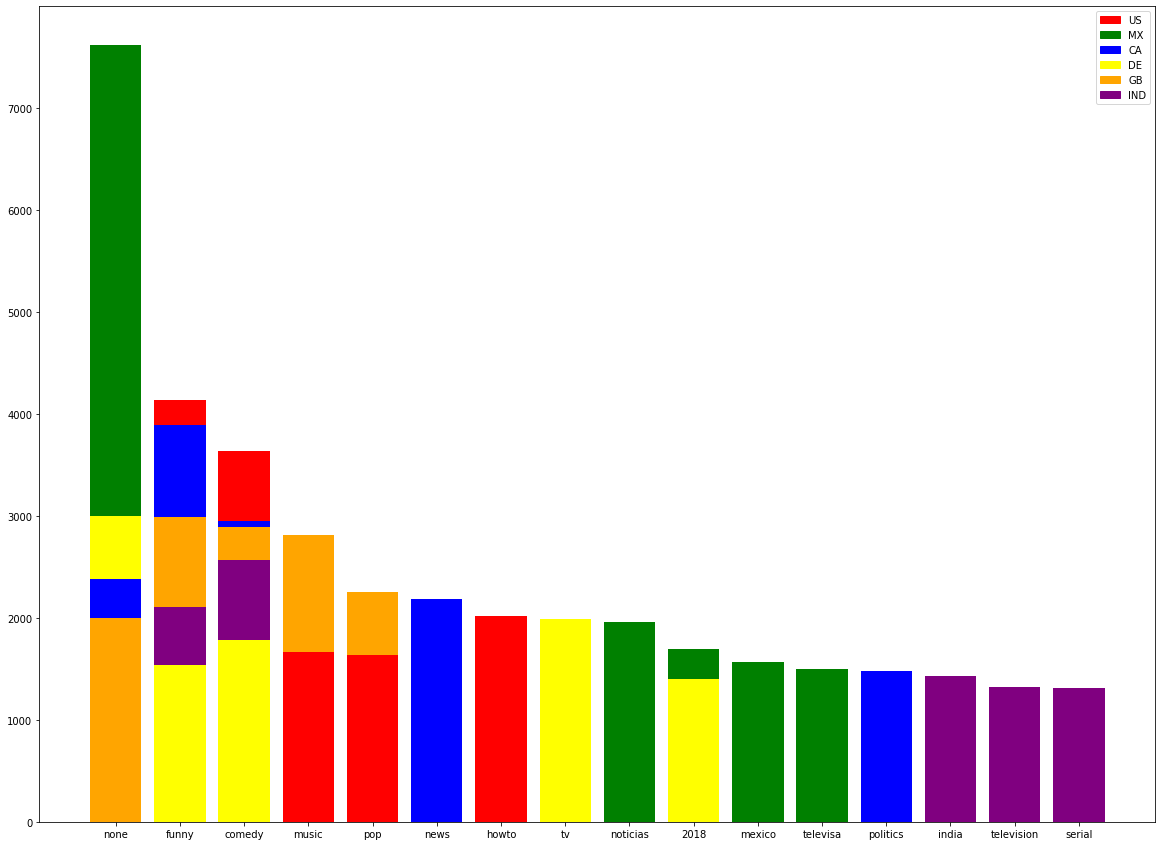

In [7]:
us_df_counts = mostTrendingTags(us).sort_values(by=[0],ascending=False).head(5)
us_df_counts['country'] = 'us'
us_df_counts['color'] = 'red'
mx_df_counts = mostTrendingTags(mx).sort_values(by=[0],ascending=False).head(5)
mx_df_counts['country'] = 'mx'
mx_df_counts['color'] = 'green'
ca_df_counts = mostTrendingTags(ca).sort_values(by=[0],ascending=False).head(5)
ca_df_counts['country'] = 'ca'
ca_df_counts['color'] = 'blue'
de_df_counts = mostTrendingTags(de).sort_values(by=[0],ascending=False).head(5)
de_df_counts['country'] = 'de'
de_df_counts['color'] = 'yellow'
gb_df_counts = mostTrendingTags(gb).sort_values(by=[0],ascending=False).head(5)
gb_df_counts['country'] = 'gb'
gb_df_counts['color'] = 'orange'
ind_df_counts = mostTrendingTags(ind).sort_values(by=[0],ascending=False).head(5)
ind_df_counts['country'] = 'ind'
ind_df_counts['color'] = 'purple'
df = us_df_counts
df = df.append(mx_df_counts) 
df = df.append(ca_df_counts) 
df = df.append(de_df_counts) 
df = df.append(gb_df_counts) 
df = df.append(ind_df_counts) 
df = df.sort_values(by=[0],ascending=False)
plt.figure(figsize = (20,15))
plt.bar(df.index, df[0], color=df['color'])
red_patch = mpatches.Patch(color='red', label='US')
green_patch = mpatches.Patch(color='green', label='MX')
blue_patch = mpatches.Patch(color='blue', label='CA')
yellow_patch = mpatches.Patch(color='yellow', label='DE')
orange_patch = mpatches.Patch(color='orange', label='GB')
purple_patch = mpatches.Patch(color='purple', label='IND')
plt.legend(handles=[red_patch, green_patch, blue_patch, yellow_patch, orange_patch, purple_patch])

# Most Trending Channels (Worldwide)

In [8]:
def mostTrendingChannel(df):
    channel_count = {}
    for title in df['channel_title']:
        channel_title = title.lower()
        channel_title = ''.join(e for e in channel_title if e.isalnum())
        if channel_title in channel_count:
            channel_count[channel_title] = channel_count[channel_title] + 1
        else:
            channel_count[channel_title] = 1
    df_channel_counts = pd.DataFrame.from_dict(channel_count, orient='index')
    return df_channel_counts

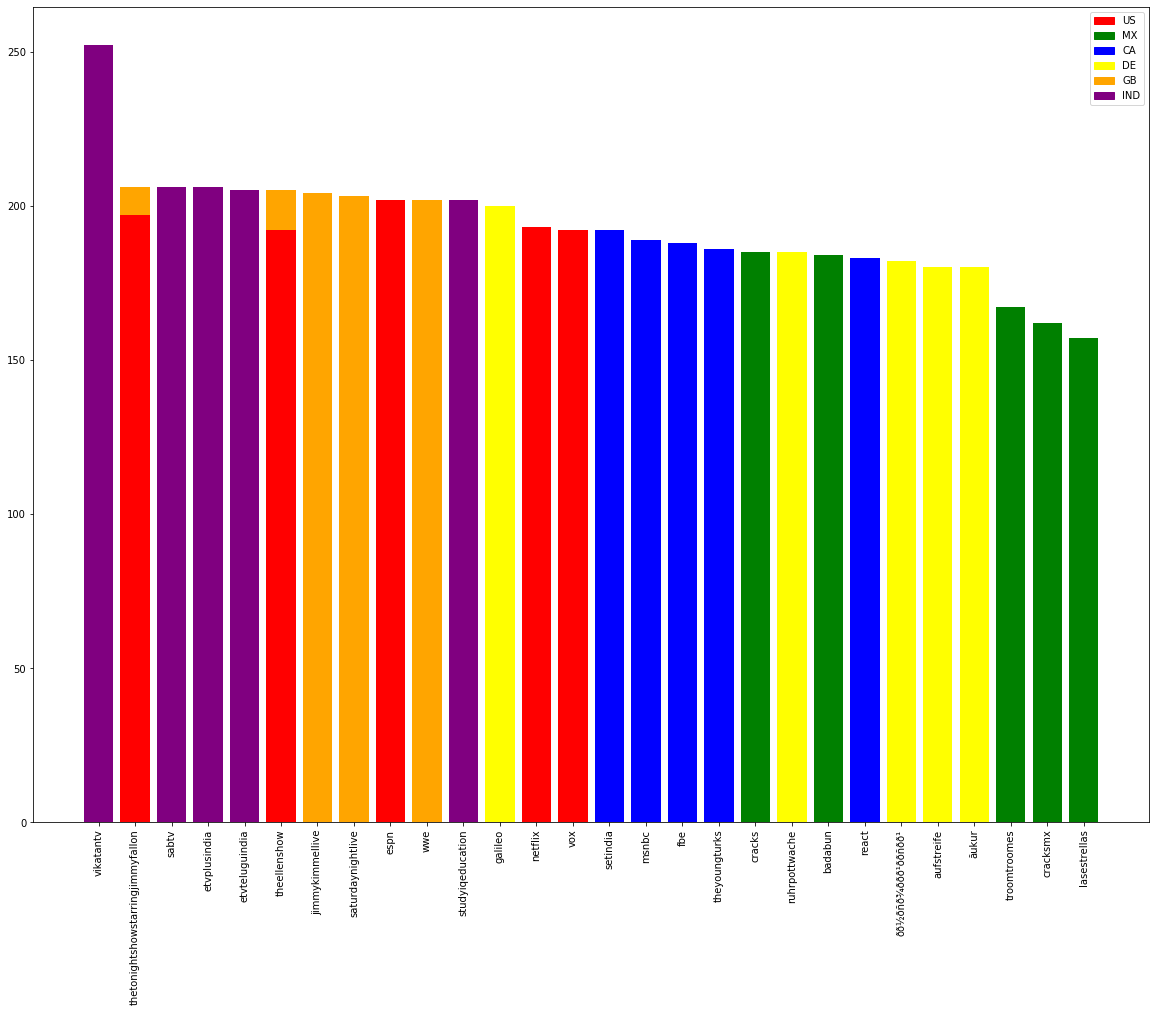

In [14]:
us_df_counts = mostTrendingChannel(us).sort_values(by=[0],ascending=False).head(5)
us_df_counts['country'] = 'us'
us_df_counts['color'] = 'red'
mx_df_counts = mostTrendingChannel(mx).sort_values(by=[0],ascending=False).head(5)
mx_df_counts['country'] = 'mx'
mx_df_counts['color'] = 'green'
ca_df_counts = mostTrendingChannel(ca).sort_values(by=[0],ascending=False).head(5)
ca_df_counts['country'] = 'ca'
ca_df_counts['color'] = 'blue'
de_df_counts = mostTrendingChannel(de).sort_values(by=[0],ascending=False).head(5)
de_df_counts['country'] = 'de'
de_df_counts['color'] = 'yellow'
gb_df_counts = mostTrendingChannel(gb).sort_values(by=[0],ascending=False).head(5)
gb_df_counts['country'] = 'gb'
gb_df_counts['color'] = 'orange'
ind_df_counts = mostTrendingChannel(ind).sort_values(by=[0],ascending=False).head(5)
ind_df_counts['country'] = 'ind'
ind_df_counts['color'] = 'purple'
df = us_df_counts
df = df.append(mx_df_counts) 
df = df.append(ca_df_counts) 
df = df.append(de_df_counts) 
df = df.append(gb_df_counts) 
df = df.append(ind_df_counts) 
df = df.sort_values(by=[0],ascending=False)
plt.figure(figsize = (20,15))
plt.bar(df.index, df[0], color=df['color'])
red_patch = mpatches.Patch(color='red', label='US')
green_patch = mpatches.Patch(color='green', label='MX')
blue_patch = mpatches.Patch(color='blue', label='CA')
yellow_patch = mpatches.Patch(color='yellow', label='DE')
orange_patch = mpatches.Patch(color='orange', label='GB')
purple_patch = mpatches.Patch(color='purple', label='IND')
plt.xticks(rotation=90)
plt.legend(handles=[red_patch, green_patch, blue_patch, yellow_patch, orange_patch, purple_patch])

# What hour were the most trending videos published? (Worldwide)

In [10]:
def mostTrendingHour(df):
    hour_count = {}
    for time in df['publish_time']:
        hour = time.split('T')[1].split(':')[0]
        if hour in hour_count:
            hour_count[hour] = hour_count[hour] + 1
        else:
            hour_count[hour] = 1
    df_hour_counts = pd.DataFrame.from_dict(hour_count, orient='index')
    return df_hour_counts

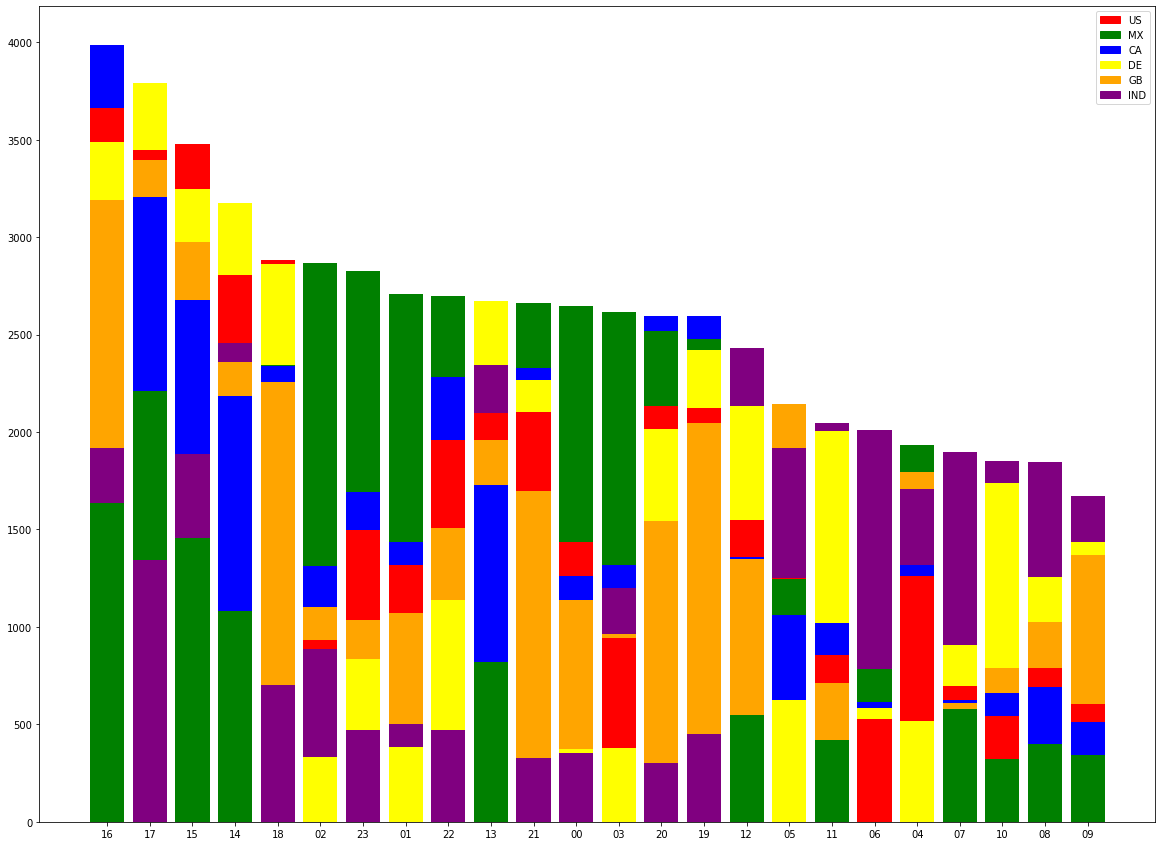

In [12]:
us_df_counts = mostTrendingHour(us).sort_index()
us_df_counts['country'] = 'us'
us_df_counts['color'] = 'red'
mx_df_counts = mostTrendingHour(mx).sort_index()
mx_df_counts['country'] = 'mx'
mx_df_counts['color'] = 'green'
ca_df_counts = mostTrendingHour(ca).sort_index()
ca_df_counts['country'] = 'ca'
ca_df_counts['color'] = 'blue'
de_df_counts = mostTrendingHour(de).sort_index()
de_df_counts['country'] = 'de'
de_df_counts['color'] = 'yellow'
gb_df_counts = mostTrendingHour(gb).sort_index()
gb_df_counts['country'] = 'gb'
gb_df_counts['color'] = 'orange'
ind_df_counts = mostTrendingHour(ind).sort_index()
ind_df_counts['country'] = 'ind'
ind_df_counts['color'] = 'purple'
df = us_df_counts
df = df.append(mx_df_counts) 
df = df.append(ca_df_counts) 
df = df.append(de_df_counts) 
df = df.append(gb_df_counts) 
df = df.append(ind_df_counts) 
df = df.sort_values(by=[0],ascending=False)
plt.figure(figsize = (20,15))
plt.bar(df.index, df[0], color=df['color'])
red_patch = mpatches.Patch(color='red', label='US')
green_patch = mpatches.Patch(color='green', label='MX')
blue_patch = mpatches.Patch(color='blue', label='CA')
yellow_patch = mpatches.Patch(color='yellow', label='DE')
orange_patch = mpatches.Patch(color='orange', label='GB')
purple_patch = mpatches.Patch(color='purple', label='IND')
plt.legend(handles=[red_patch, green_patch, blue_patch, yellow_patch, orange_patch, purple_patch])